In [1]:
import os
import sys
from datetime import datetime

sys.path.append(os.path.dirname(sys.path[0]))

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [85]:
import scripts.constants as con
from scripts.plotter import Plotter

con.PATH_TO_DATA

'D:\\albert\\programming\\git_reps\\molecular_dynamics\\data'

In [54]:
rmc_generations, rmc_errors = [], []
with open(os.path.join(con.PATH_TO_DATA, 'fullrmc.log'), encoding='utf-8') as file:
    for line in file:
        rmc_generations.append(1)
        rmc_errors.append(float(line.rstrip().split(': ')[1]))
        break
    for line in file:
        if 'Err' not in line:
            continue
        rmc_generations.append(int(line.rstrip().split('Gen:')[1].split(' - ')[0]))
        rmc_errors.append(float(line.rstrip().split('Err:')[1]))

rmc_generations = np.array(rmc_generations)
rmc_errors = np.array(rmc_errors)
rmc_generations, rmc_errors

(array([       1,        5,        6, ..., 43190269, 43194731, 43195688]),
 array([62576.558594, 62482.957031, 62481.277344, ...,  2343.905762,
         2343.905762,  2343.9021  ]))

In [29]:
hj_errors = []

with open(os.path.join(con.PATH_TO_DATA, 'hj.txt'), encoding='utf-8') as file:
    for line in file:
        if line[0] == '(':
            hj_errors.append(float(line[1:].split(',')[0]))
        elif line[0] == '[':
            hj_errors.append(float(line[1:].split()[0]))
        else:
            continue

hj_errors = np.array(hj_errors[:-1])
hj_errors

array([4.73867712, 4.73867712, 4.7094998 , ..., 0.50624715, 0.50624715,
       0.50624715])

In [74]:
rmo_errors = []

with open(os.path.join(con.PATH_TO_DATA, 'rmo_new.txt'), encoding='utf-8') as file:
    for line in file:
        if line.startswith('gen'):
            rmo_errors.append(float(line.split('global = ')[1].split(';')[0]))
        elif line.startswith('Current MSE = '):
            rmo_errors.append(float(line.rstrip().split(' = ')[1]))
        elif line[0] == '(':
            rmo_errors.append(float(line[1:].split(',')[0]))
        elif line[0] == '[':
            rmo_errors.append(float(line[1:].split()[0]))
        else:
            continue

rmo_errors = np.array(rmo_errors[:-1])
rmo_errors

array([3.6928    , 3.6928    , 3.5097    , ..., 0.17947591, 0.17947591,
       0.17947591])

In [87]:
CURRENT_DATA_NORMAL = '2021-09-24_prepared_1.3_normal'
PLOT_FILENAME_POSTFIX_NORMAL = 'rmo'

PATH_TO_CURRENT_DATA_NORMAL = os.path.join(con.PATH_TO_DATA, CURRENT_DATA_NORMAL)
PATH_TO_PLOTS = os.path.join(con.PATH_TO_PLOTS, CURRENT_DATA_NORMAL)

PATH_TO_CURRENT_DATA_NORMAL

'D:\\albert\\programming\\git_reps\\molecular_dynamics\\data\\2021-09-24_prepared_1.3_normal'

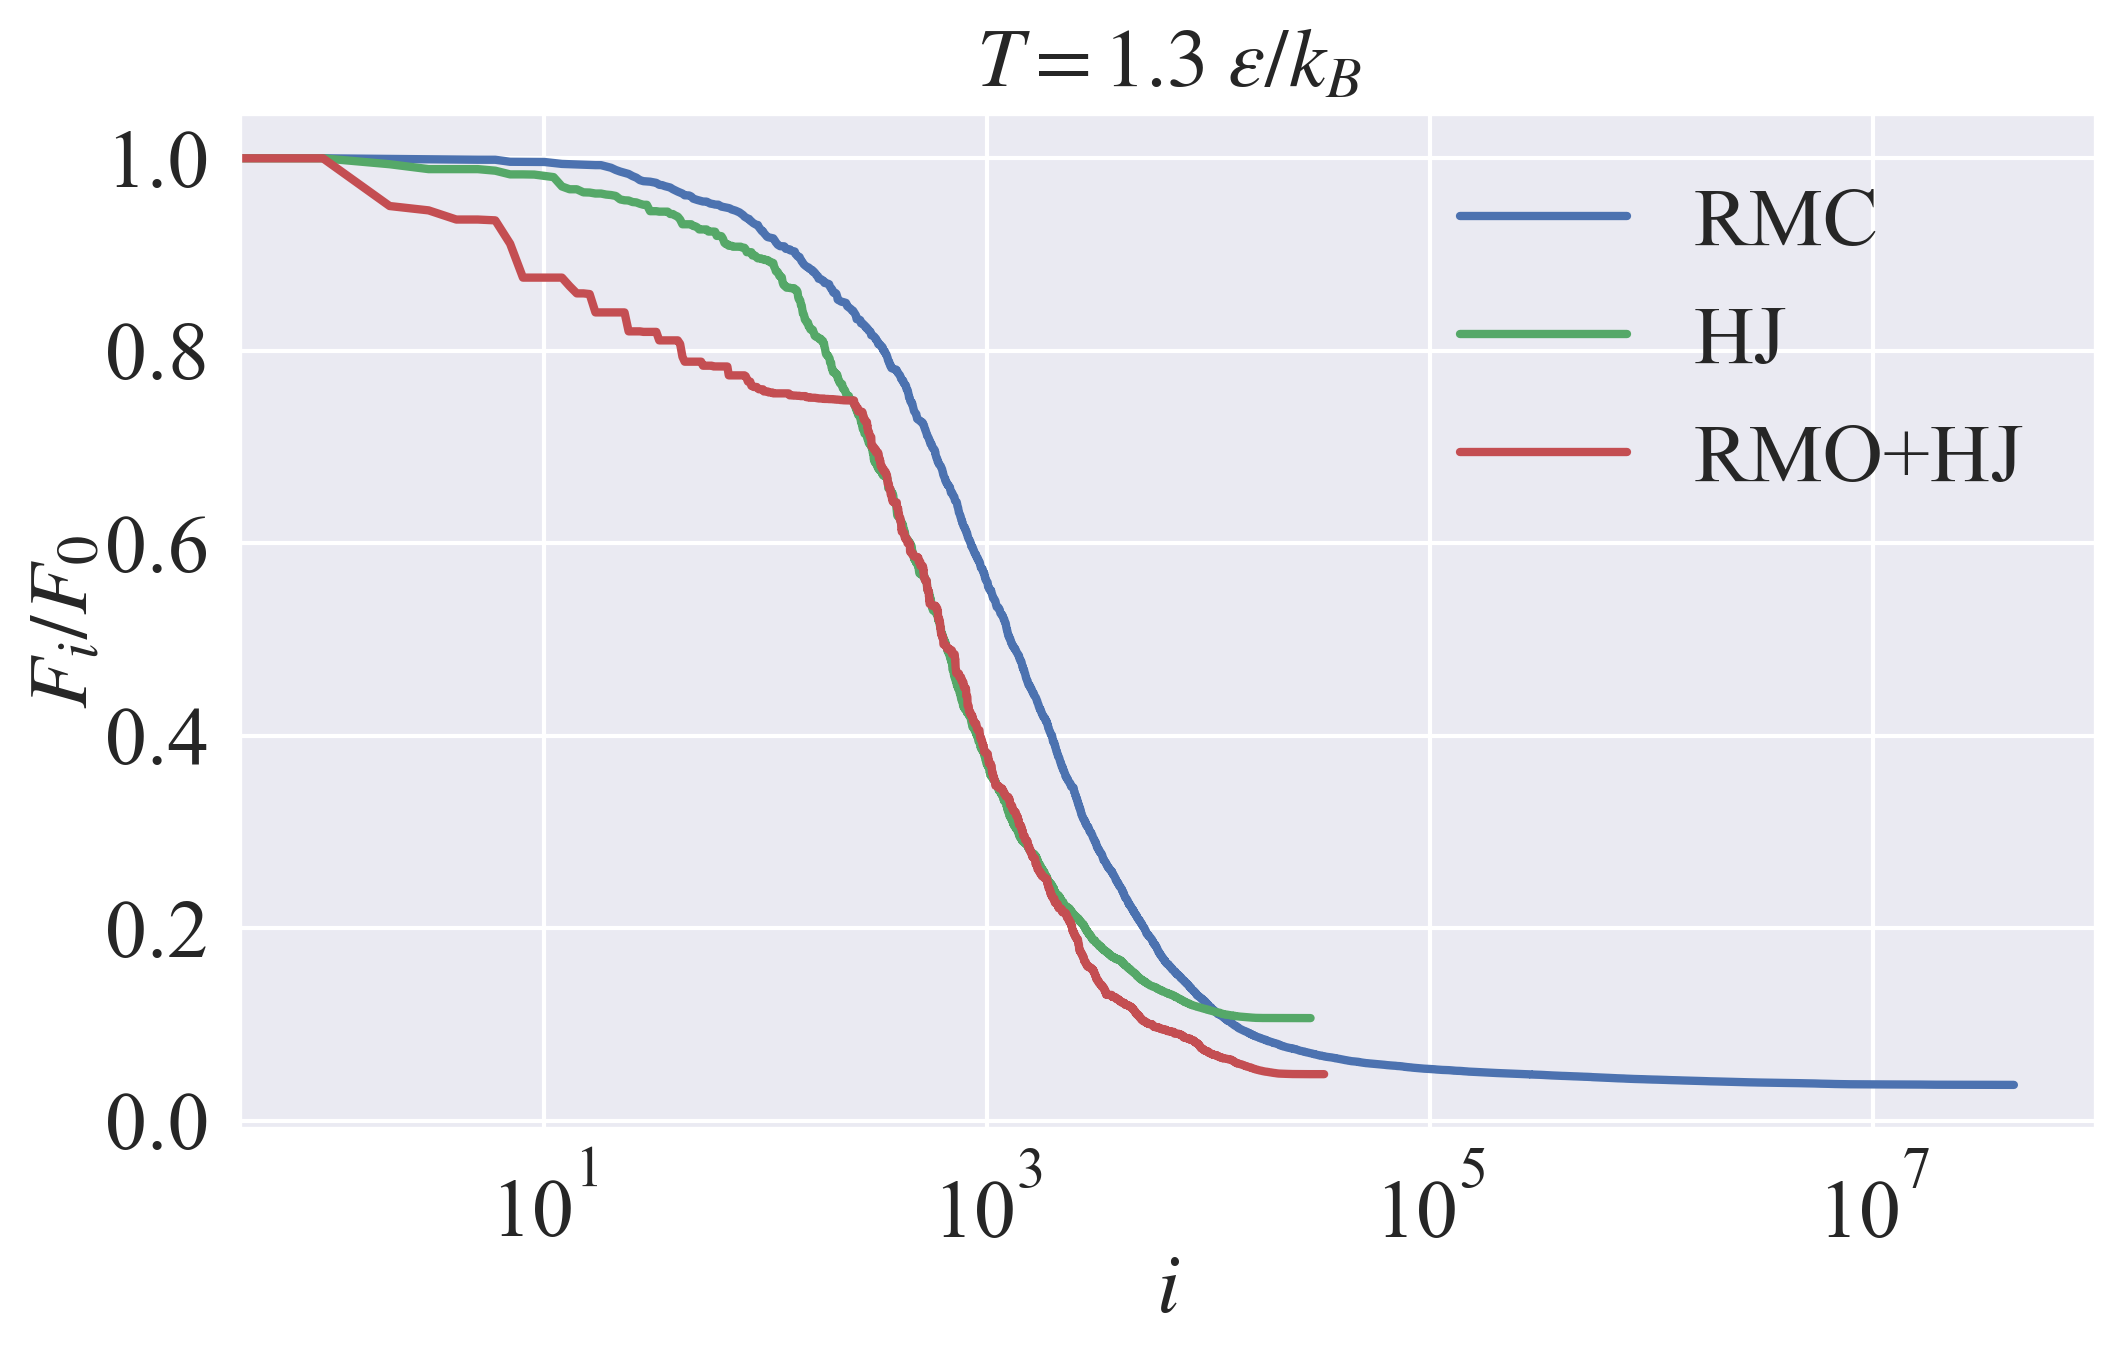

In [98]:
plotter = Plotter(
    path_to_plots=PATH_TO_PLOTS,
    labels=(r'$i$', r'$F_i / F_0$'),
    size=(8,4.5),
)

plotter.ax.plot(rmc_generations, rmc_errors / rmc_errors[0], label='RMC')
plotter.ax.plot(hj_errors / hj_errors[0], label='HJ')
plotter.ax.plot(rmo_errors / rmo_errors[0], label='RMO+HJ')
plotter.ax.set_xscale('log')
plotter.set_title(fr'$T = 1.3~\varepsilon / k_B$')
plotter.get_legend()
plotter.save_plot('comparison.png')
plotter.save_plot('comparison.eps')
plt.show()